Loading and Exploring the Data

In [12]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Yibabe\Desktop\10academykifiyaAIMweek-10\data\Copy of BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


C:\Users\Yibabe\AppData\Local\Temp\ipykernel_5800\3897055374.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(r'C:\Users\Yibabe\Desktop\10academykifiyaAIMweek-10\data\Copy of BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


In [14]:
data.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


 Identify Missing or Anomalous Values

In [16]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

In [17]:
data.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


2 Preprocessing the Data

2.1 Convert Date Format Consistently

In [18]:
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

2.2 Set the Date Column as the Index

In [19]:
data.set_index('Date', inplace=True)


In [22]:
data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


3 Exploratory Data Analysis (EDA)

3.1 Visualize Trends, Seasonality, and Patterns

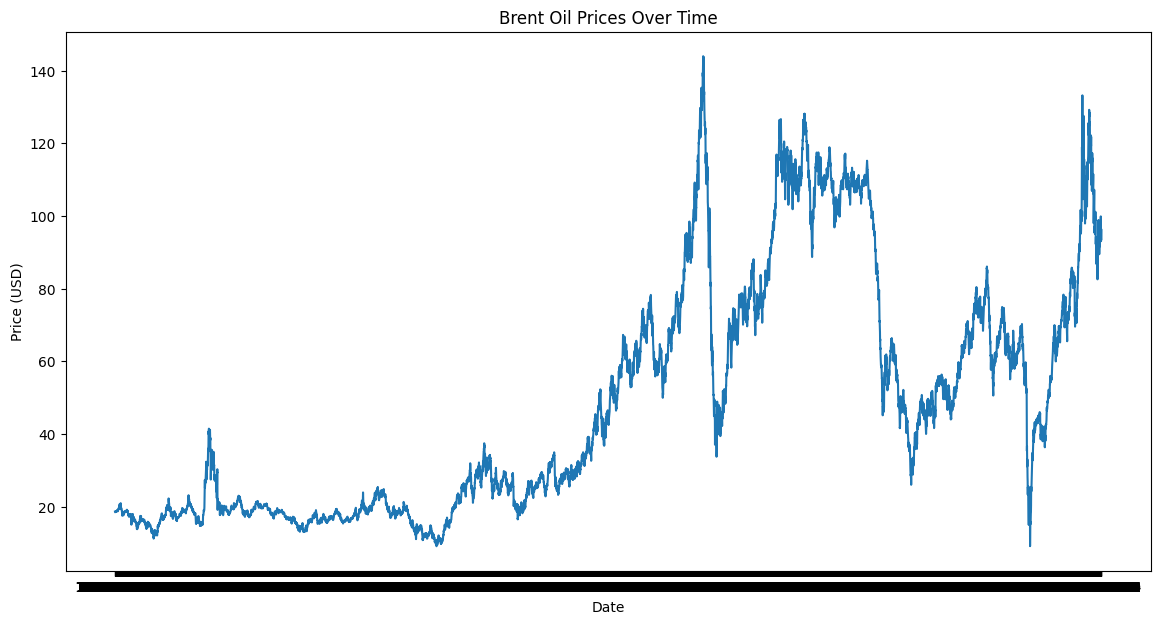

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


3.2 Analyze Price Fluctuations

<AxesSubplot: title={'center': '30-Day Moving Average of Brent Oil Prices'}, xlabel='Date'>

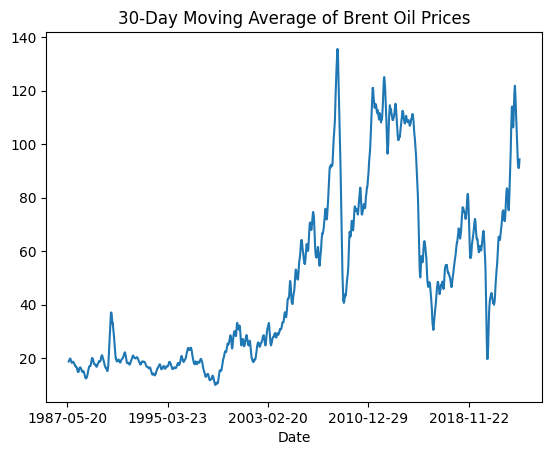

In [25]:
data['Price'].rolling(window=30).mean().plot(title='30-Day Moving Average of Brent Oil Prices')

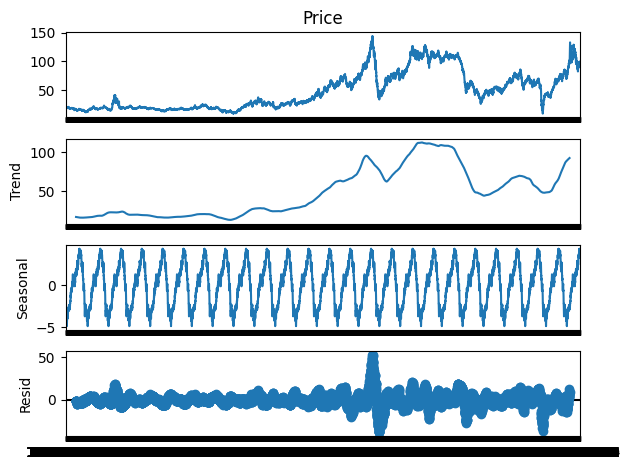

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Price'], model='additive', period=365)  # Adjust period based on seasonality
result.plot()
plt.show()


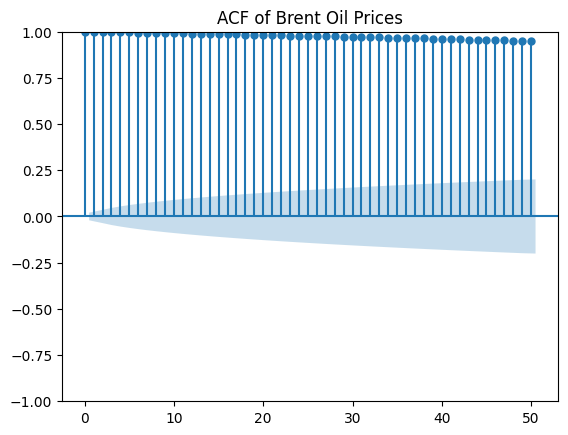

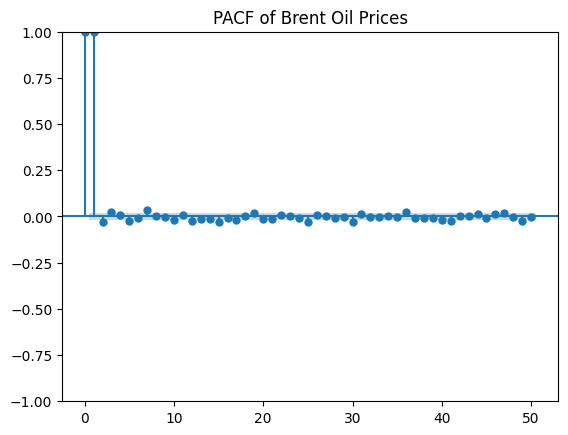

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['Price'], lags=50)
plt.title('ACF of Brent Oil Prices')
plt.show()

plot_pacf(data['Price'], lags=50)
plt.title('PACF of Brent Oil Prices')
plt.show()


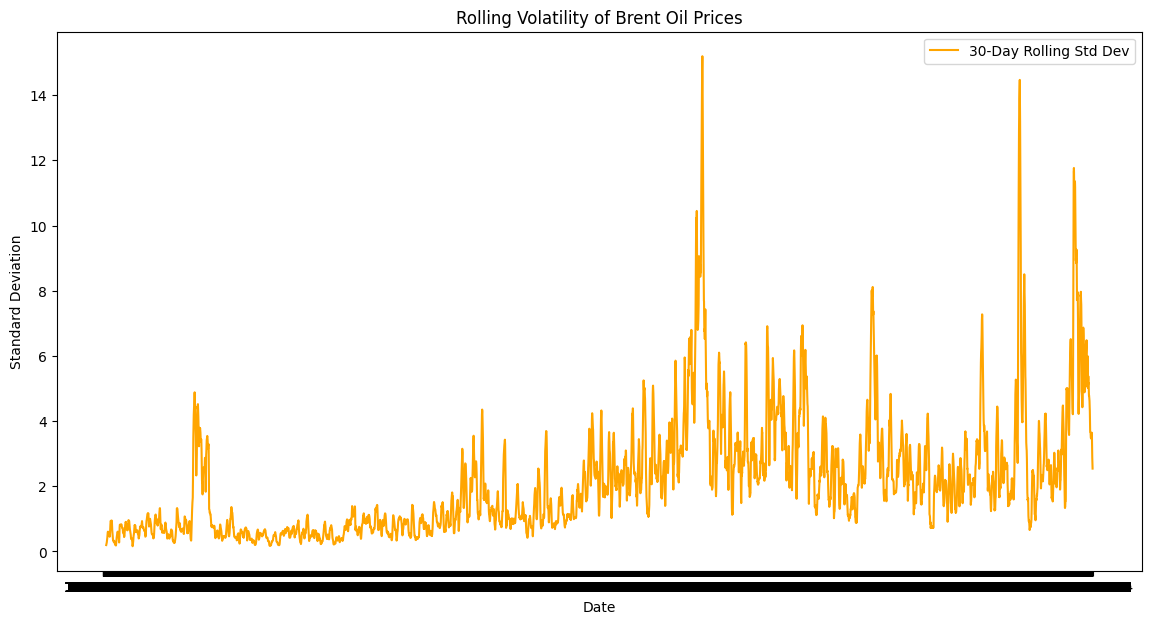

In [43]:
rolling_std = data['Price'].rolling(window=30).std()
plt.figure(figsize=(14, 7))
plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='orange')
plt.title('Rolling Volatility of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show() 


3.3 Detect Change Points

In [29]:
import ruptures as rpt
signal = data['Price'].values
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

In [34]:
result #this indicates the price of the oil flacutate at this day due to something happen

[820,
 935,
 2695,
 3100,
 4220,
 4370,
 4600,
 5090,
 5200,
 5315,
 5415,
 5445,
 5595,
 5695,
 5980,
 6035,
 6340,
 6925,
 6985,
 7155,
 7350,
 7700,
 7840,
 7990,
 8330,
 8380,
 8540,
 8640,
 8815,
 8940,
 9011]

In [36]:
len(result) #this is the total detect change point

31

Example of Analyzing Change Points

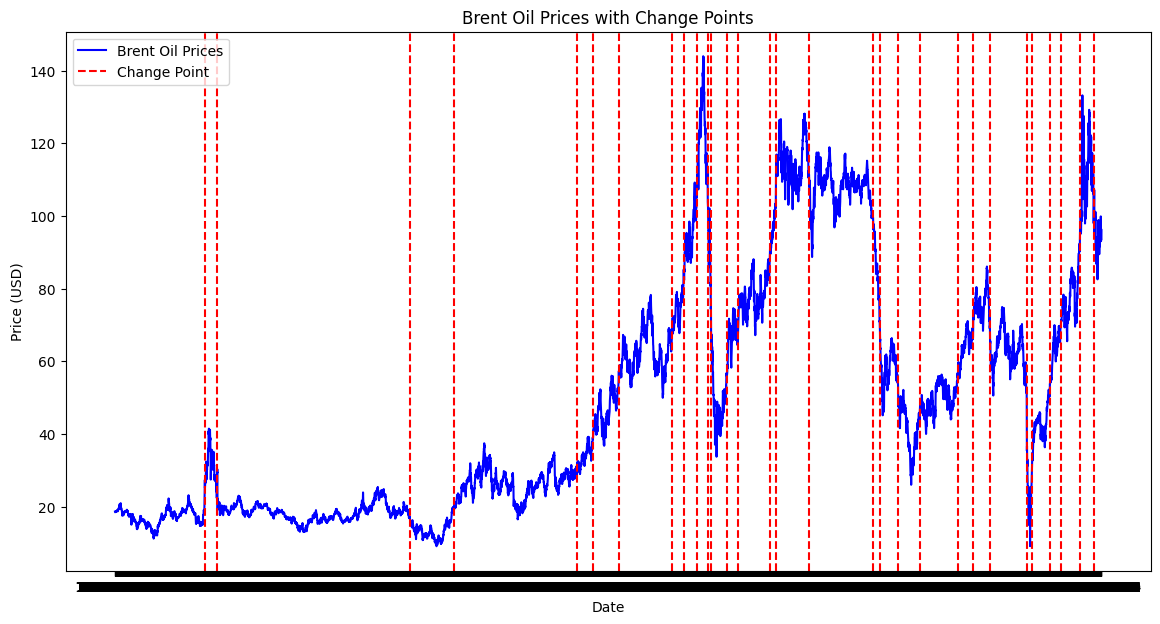

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(data['Price'], label='Brent Oil Prices', color='blue')  # Plot the prices
# Track if the label has been added
change_point_label_added = False
for cp in result:
    # Only plot change points that are within the bounds of the data
    if cp < len(data):  # This ensures we only access valid indices
        plt.axvline(x=data.index[cp], color='red', linestyle='--', 
                    label='Change Point' if not change_point_label_added else "")
        change_point_label_added = True  # Set to True after first use

plt.title('Brent Oil Prices with Change Points')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
